In [61]:
# Capstone Project: Student Success & Career Path Prediction

# Scenario

# The university wants to analyze student performance data to:

# Predict exam scores (Regression).
# Classify students into “At Risk” vs. “On Track” categories (Classification).
# Cluster students into groups with similar study habits (Clustering).
# Recommend interventions (extra tutoring, workshops, counseling).



import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score

In [62]:
df = pd.read_csv('Student Success & Career Path.csv')
df

,Student_ID,Hours_Studied,Attendance (%),Assignments_Submitted,Previous_Sem_GPA,Participation_Score,Final_Exam_Score,Pass_Fail,Career_Readiness_Score,Age,Gender
0,S001,10,85,8,3.2,70,78,Pass,65,20,Female
1,S002,5,60,5,2.5,55,55,Fail,40,21,Male
2,S003,12,90,9,3.8,80,88,Pass,75,22,Female
3,S004,3,40,3,2.0,45,45,Fail,35,19,Male
4,S005,8,75,7,3.0,65,70,Pass,60,23,Female
5,S006,6,65,6,2.7,60,60,Pass,55,20,Male
6,S007,2,30,2,1.8,40,40,Fail,25,21,Female
7,S008,11,88,9,3.5,75,82,Pass,70,22,Male
8,S009,4,50,4,2.2,50,50,Fail,45,19,Female
9,S010,9,80,8,3.1,68,75,Pass,62,20,Male


In [63]:
# Predict exam scores (Regression).

X = df[['Hours_Studied', 'Attendance (%)', 'Assignments_Submitted',
     'Previous_Sem_GPA', 'Participation_Score']]
y = df['Final_Exam_Score']



x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = LinearRegression()
model.fit(x_train, y_train)

# Predictions
y_pred = model.predict(x_test)

# Evaluation
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.978135394198923
RMSE: 1.7068856795326106


In [64]:
# Classify students into “At Risk” vs. “On Track” categories (Classification).
# If exam score ≥ 50 → student is On Track (1) , If exam score < 50 → student is At Risk (0)


df['status'] = df['Final_Exam_Score'].apply(lambda x: 1 if x >= 50 else 0)

X = df[['Hours_Studied', 'Attendance (%)', 'Assignments_Submitted' , 'Previous_Sem_GPA' , 'Participation_Score' ]]
y = df['status']


x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(y_pred)
print('\n')

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[1 1 1 1]


Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



C:\Users\naina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


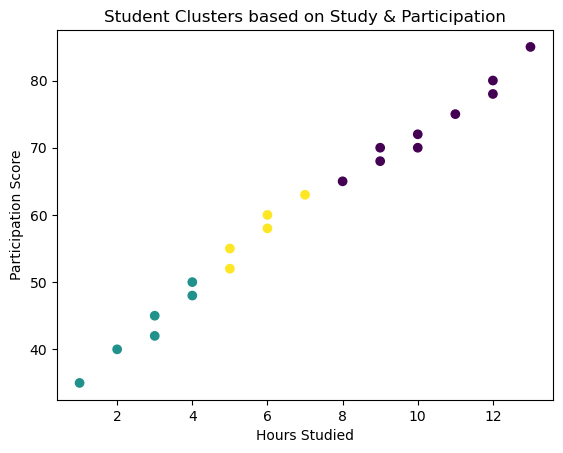

In [65]:
# Cluster students into groups with similar study habits (Clustering).

X=df[['Hours_Studied','Attendance (%)','Assignments_Submitted','Participation_Score']]
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)


plt.scatter(df['Hours_Studied'], df['Participation_Score'], 
            c=df['Cluster'], cmap='viridis')

plt.xlabel('Hours Studied')
plt.ylabel('Participation Score')
plt.title('Student Clusters based on Study & Participation')
plt.show()


In [66]:
# Recommend interventions (extra tutoring, workshops, counseling).

def get_recommendation(row):
    if row['status'] == 0:   # student is At Risk
        if row['Cluster'] == 0:
            return 'Extra Tutoring'
        elif row['Cluster'] == 1:
            return 'Workshops'
        elif row['Cluster'] == 2:
            return 'Counseling'
    return 'Nothing'   # student is On Track

df['recommendation'] = df.apply(get_recommendation, axis=1)
df['recommendation']

0       Nothing
1       Nothing
2       Nothing
3     Workshops
4       Nothing
5       Nothing
6     Workshops
7       Nothing
8       Nothing
9       Nothing
10      Nothing
11    Workshops
12      Nothing
13      Nothing
14    Workshops
15      Nothing
16      Nothing
17      Nothing
18    Workshops
19      Nothing
Name: recommendation, dtype: object

In [67]:
df

,Student_ID,Hours_Studied,Attendance (%),Assignments_Submitted,Previous_Sem_GPA,Participation_Score,Final_Exam_Score,Pass_Fail,Career_Readiness_Score,Age,Gender,status,Cluster,recommendation
0,S001,10,85,8,3.2,70,78,Pass,65,20,Female,1,0,Nothing
1,S002,5,60,5,2.5,55,55,Fail,40,21,Male,1,2,Nothing
2,S003,12,90,9,3.8,80,88,Pass,75,22,Female,1,0,Nothing
3,S004,3,40,3,2.0,45,45,Fail,35,19,Male,0,1,Workshops
4,S005,8,75,7,3.0,65,70,Pass,60,23,Female,1,0,Nothing
5,S006,6,65,6,2.7,60,60,Pass,55,20,Male,1,2,Nothing
6,S007,2,30,2,1.8,40,40,Fail,25,21,Female,0,1,Workshops
7,S008,11,88,9,3.5,75,82,Pass,70,22,Male,1,0,Nothing
8,S009,4,50,4,2.2,50,50,Fail,45,19,Female,1,1,Nothing
9,S010,9,80,8,3.1,68,75,Pass,62,20,Male,1,0,Nothing
